In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
import glob
uni = "date202205027"

path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*" + uni +"*/train.csv"
train_path = glob.glob(path)
train_list = [file for file in train_path if file.endswith(".csv")]




path = "/users/yewzzang/work/HEPGNN_4top_resampling/result/*"+uni +"*/*"+uni +"*.csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]





d = train_list
dd = pred_list


In [3]:
# d = ['/users/yewzzang/work/HEPGNN_4top_resampling/result/date20220512_real_run_cut/train.csv',
#  '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205012_resam_run/train.csv']

In [4]:
# dd = ['/users/yewzzang/work/HEPGNN_4top_resampling/result/date20220512_real_run_cut/date20220512_real_run_cut.csv',
#  '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205012_resam_run/date202205012_resam_run.csv']

In [5]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 5
plt.rcParams["legend.loc"] = 'upper right'
plt.rcParams["legend.frameon"] = False
plt.rcParams["legend.loc"] = 'upper left'

In [6]:
# d = ['/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205026_neg_test/train.csv',
#  '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205026_abs_test/train.csv',
#     '/users/yewzzang/work/HEPGNN_4top_resampling/result/date20220524_resam_run1/train.csv',
#     '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_normal_test_1L/train.csv',
#  '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_normal_test_2L/train.csv']

In [7]:
d

['/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_normal_test_2L/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_neg_test/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_abs_test_2L/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_neg_test_1L/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_normal_test/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_normal_test_1L/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_abs_test/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_abs_test_1L/train.csv',
 '/users/yewzzang/work/HEPGNN_4top_resampling/result/date202205027_neg_test_2L/train.csv']

/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:37: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.


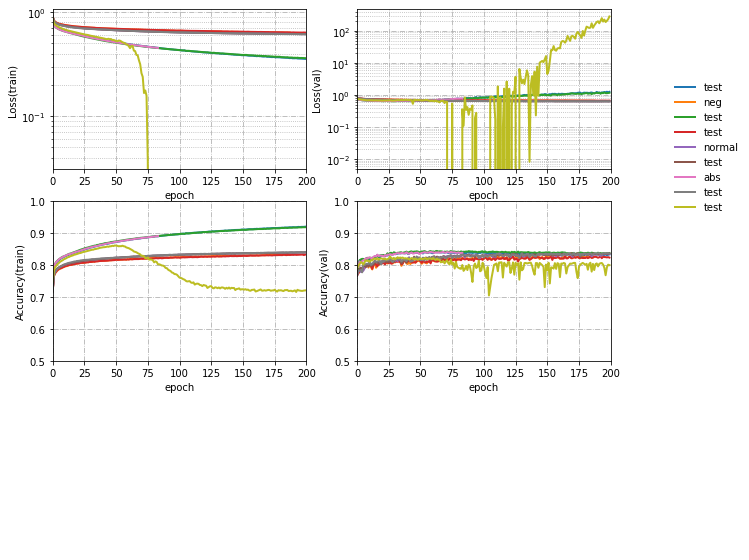

In [8]:
plt.rcParams['figure.figsize'] = (10, 10)
# plt.rcParams['figure.figsize'] = (10, 10)
ax1 = plt.subplot(3, 2, 1, yscale='log', ylabel='Loss(train)', xlabel='epoch')
ax2 = plt.subplot(3, 2, 2, yscale='log', ylabel='Loss(val)', xlabel='epoch')
# ax1 = plt.subplot(3, 2, 1, ylabel='Loss(train)', xlabel='epoch')
# ax2 = plt.subplot(3, 2, 2, ylabel='Loss(val)', xlabel='epoch')
ax3 = plt.subplot(3, 2, 3, ylabel='Accuracy(train)', xlabel='epoch')
ax4 = plt.subplot(3, 2, 4, ylabel='Accuracy(val)', xlabel='epoch')
# ax1.set_ylim([0, 100])
# ax2.set_ylim([0, 100])
ax3.set_ylim([0.5,1.0])
ax4.set_ylim([0.5,1.0])
for ax in (ax1, ax2, ax3, ax4):
    ax.grid(which='major', axis='both', linestyle='-.')
    ax.grid(which='minor', linestyle=':')
    ax.set_xlim([0,200])
lines, labels = [], []

for i in range(len(d)):
    df = pd.read_csv(d[i])

    label = d[i].split('/')[-2].replace('__', ' ').split('_')[-2]
#     label = d[i]
    l =  ax1.plot(df['loss'], linewidth=2)
    ax2.plot(df['val_loss'], linewidth=2)
    ax3.plot(df['acc'], linewidth=2)
    ax4.plot(df['val_acc'], linewidth=2)


    
    lines.append(l[0])
    labels.append(label)
ax5 = plt.subplot(3,1,3)
ax5.legend(lines, labels, fontsize = 20)
ax5.legend(lines, labels, bbox_to_anchor=(1.1, -4, 7, 7))
ax5.axis('off')
plt.tight_layout()
# plt.savefig('acc_loss.png',dpi=300)
plt.show()
plt.close()

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score


#plt.yscale('log')
plt.figure(figsize=(10,10))
for i in range(len(dd)):
    df = pd.read_csv(dd[i])
#     df2 = pd.read_csv(ddd[i])
    tpr, fpr, thr = roc_curve(df['label'], df['prediction'], sample_weight=df['scale']*df['weight'], pos_label=0)
    try:
        auc = roc_auc_score(df['label'], df['prediction'], sample_weight=df['scale']*df['weight'])
    except:
        aaa = 0 
        for j in range(len(fpr)):
            if j == 0:
                aa = tpr[j]*(fpr[j]-0)
            else:
                aa = tpr[j]*(fpr[j]-fpr[j-1])
            aaa = aaa + aa
        auc = aaa



#     plt.plot(fpr, tpr, label=dd[i].split('/')[-2].replace('__', ' ')+'  AUC = %.3f' % (auc))
#     lab = d[i].split('/')[-2].replace('__', ' ')
#     lab = ddd[i]
    plt.plot(fpr, tpr, label='AUC = %.3f' % (auc) + '   ' , linewidth='2')
#     plt.plot(fpr, tpr, linewidth='2')
 
        
        
#     plt.xlabel('FN efficiency')
#     plt.ylabel('ME efficiency')
    #plt.xlim(0, 0.001)
    plt.xlim(0, 1.000)
    plt.ylim(0, 1.050)
    plt.legend(loc = 'lower right',fontsize=20)
#     plt.legend(bbox_to_anchor=(1.1, -14, 15, 15))
    # plt.savefig('result/' +args.output + '/' + args.output + '_efficiency.png', dpi=300)
    plt.grid()
#     plt.show()

  



KeyError: 'label'

<Figure size 720x720 with 0 Axes>